In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
training_data = pd.read_csv("training_data.csv")

In [3]:
training_data.head(5)

,favorite_count,full_text,hashtags,retweet_count,year,dim1_nominate,dim2_nominate
0,8,b'WATCH my speech on the @SenateFloor to learn...,PatientFreedomAct,3,2017,0.243962,0.170366
1,2,b'Boehner delays leadership races. Only speake...,rossformajoritywhip,3,2015,0.561728,0.089540
2,5,"b""I'll be sharing #scarynumbers about #governm...",scarynumbers governmentspending,4,2014,0.513246,-0.224541
3,34,"b""#OTD in '64, LBJ took important step towards...",OTD,14,2017,-0.241932,0.097843
4,23,b'My bipartisan bill is a step toward protecti...,VA07,7,2020,-0.225722,0.329999


Section A : part a)

In [4]:
import ast
def convert_to_bytes_string_and_decode_to_string(text):
    byte_string = ast.literal_eval(text)
    return byte_string.decode('utf-8')

training_data['full_text'] = training_data['full_text'].apply(convert_to_bytes_string_and_decode_to_string)

training_data

,favorite_count,full_text,hashtags,retweet_count,year,dim1_nominate,dim2_nominate
0,8,WATCH my speech on the @SenateFloor to learn m...,PatientFreedomAct,3,2017,0.243962,0.170366
1,2,Boehner delays leadership races. Only speaker ...,rossformajoritywhip,3,2015,0.561728,0.089540
2,5,I'll be sharing #scarynumbers about #governmen...,scarynumbers governmentspending,4,2014,0.513246,-0.224541
3,34,"#OTD in '64, LBJ took important step towards f...",OTD,14,2017,-0.241932,0.097843
4,23,My bipartisan bill is a step toward protecting...,VA07,7,2020,-0.225722,0.329999
...,...,...,...,...,...,...,...
333982,97,I am working to make Social Security stronger ...,ExpandSocialSecurity,29,2018,-0.423522,0.005929
333983,11,Climate change -&gt; altered CA forest ecosyst...,actonclimate,11,2016,-0.436272,-0.546745
333984,82,The @USChamber and other business lobbying gro...,climate,34,2019,-0.309244,-0.070852
333985,1,I look forward to answering constituent’s ques...,TeleTownHall,1,2016,-0.516671,0.205851


In [5]:
df_training = pd.DataFrame(data=training_data)
df_training['text_char_len'] = df_training['full_text'].apply(lambda x: len(x))

for i in range(len(df_training)):
    words = df_training.loc[i, 'full_text'].split()

    df_training.loc[i, 'text_word_len'] = len(words)

In [6]:
df_training['hashtags']

0                       PatientFreedomAct
1                     rossformajoritywhip
2         scarynumbers governmentspending
3                                     OTD
4                                    VA07
                       ...               
333982               ExpandSocialSecurity
333983                       actonclimate
333984                            climate
333985                       TeleTownHall
333986                  MissouriSpotlight
Name: hashtags, Length: 333987, dtype: object

In [7]:
df_training['hash_char_len'] = df_training['hashtags'].apply(lambda x: len(''.join(x.split())))
df_training['hash_word_len'] = df_training['hashtags'].apply(lambda x: len(x.split()))

In [8]:
stats = {
    'text' : {
        'char' : {
                'mini' : df_training['text_char_len'].min(),
                'avg' : df_training['text_char_len'].mean(),
                'med' : df_training['text_char_len'].median(),
                'maxi' : df_training['text_char_len'].max()
        },
        'word' : {
                'mini' : df_training['text_word_len'].min(),
                'avg' : df_training['text_word_len'].mean(),
                'med' : df_training['text_word_len'].median(),
                'maxi' : df_training['text_word_len'].max()
        }
    },
    'hashtag' : {
        'char' : {
                'mini' : df_training['hash_char_len'].min(),
                'avg' : df_training['hash_char_len'].mean(),
                'med' : df_training['hash_char_len'].median(),
                'maxi' : df_training['hash_char_len'].max()
        },
        'word' : {
                'mini' : df_training['hash_word_len'].min(),
                'avg' : df_training['hash_word_len'].mean(),
                'med' : df_training['hash_word_len'].median(),
                'maxi' : df_training['hash_word_len'].max()
        }
    }
}

stats

{'text': {'char': {'mini': np.int64(4),
   'avg': np.float64(173.82392727860665),
   'med': np.float64(143.0),
   'maxi': np.int64(531)},
  'word': {'mini': np.float64(1.0),
   'avg': np.float64(25.03559120564573),
   'med': np.float64(21.0),
   'maxi': np.float64(67.0)}},
 'hashtag': {'char': {'mini': np.int64(1),
   'avg': np.float64(14.044142436681668),
   'med': np.float64(12.0),
   'maxi': np.int64(168)},
  'word': {'mini': np.int64(1),
   'avg': np.float64(1.4919802267752937),
   'med': np.float64(1.0),
   'maxi': np.int64(17)}}}

In [9]:
stats_table = pd.DataFrame(columns = ["#char_text", "#word_text","#char_hashtag","#word_hashtag"], index =["Min","Avg","Med","Max"])

In [10]:
for metric, content in stats.items():
    for length_type, value in content.items():
        for stat, magnitude in value.items():
            index_map = {
                'mini' : 'Min',
                'avg' :'Avg',
                'med' : 'Med',
                'maxi' : 'Max'
            }
            column = f"#{length_type}_{metric}"
            index = index_map[stat]
            
            stats_table.loc[index,column] = magnitude
            
stats_table

,#char_text,#word_text,#char_hashtag,#word_hashtag
Min,4,1.0,1,1
Avg,173.823927,25.035591,14.044142,1.49198
Med,143.0,21.0,12.0,1.0
Max,531,67.0,168,17


Section A : part b)

In [11]:
hashtags = {}

for i in range(len(df_training)):
    tags = df_training.loc[i, 'hashtags'].split()
    for tag in tags:
        hashtags[tag] = hashtags.get(tag, 1) + 1

sorted_hashtags_desc = dict(sorted(hashtags.items(), key=lambda item: item[1], reverse=True))

top_10_hashtags = list(sorted_hashtags_desc.keys())[0:10]

top_10_hashtags

['COVID19',
 'tcot',
 'SOTU',
 'Obamacare',
 'utpol',
 'coronavirus',
 'ForThePeople',
 'ACA',
 'ProtectOurCare',
 '4jobs']

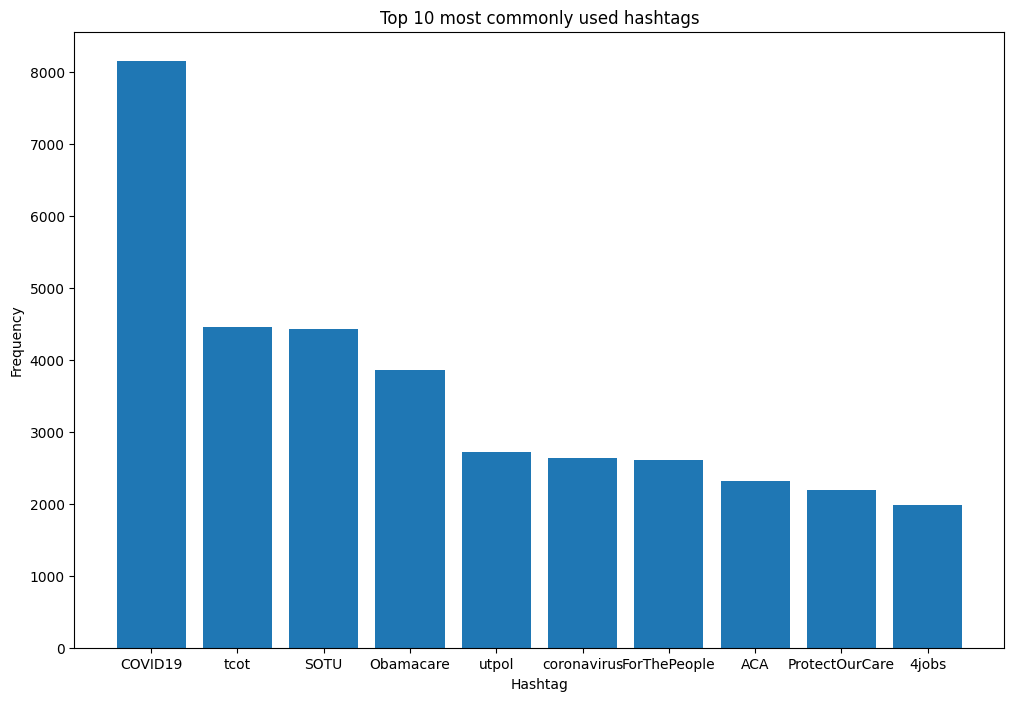

In [12]:
plt.figure(figsize = (12,8))
plt.bar(top_10_hashtags, list(sorted_hashtags_desc.values())[0:10])
plt.xlabel('Hashtag')
plt.ylabel('Frequency')
plt.title('Top 10 most commonly used hashtags')
plt.show()

Do you observe any
patterns? What are the meanings / interpretations of the hashtags you have identified?

Section A : part c)

In [13]:
df_training_group_1 = df_training[(df_training['dim1_nominate'] > 0) & (df_training['dim2_nominate'] > 0)].reset_index()
df_training_group_2 = df_training[(df_training['dim1_nominate'] > 0) & (df_training['dim2_nominate'] < 0)].reset_index()
df_training_group_3 = df_training[(df_training['dim1_nominate'] < 0) & (df_training['dim2_nominate'] > 0)].reset_index()
df_training_group_4 = df_training[(df_training['dim1_nominate'] < 0) & (df_training['dim2_nominate'] < 0)].reset_index()

In [14]:
hashtags_group_1 = {}

for i in range(len(df_training_group_1)):
    tags = df_training_group_1.loc[i, 'hashtags'].split()
    for tag in tags:
        hashtags_group_1[tag] = hashtags_group_1.get(tag, 1) + 1

sorted_hashtags_group_1_desc = dict(sorted(hashtags_group_1.items(), key=lambda item: item[1], reverse=True))

top_10_hashtags_group_1 = list(sorted_hashtags_group_1_desc.keys())[0:10]

top_10_hashtags_group_1

['tcot',
 'Obamacare',
 'COVID19',
 'SOTU',
 'TaxReform',
 'utpol',
 'AR3',
 'taxreform',
 '4jobs',
 'USMCA']

In [15]:
hashtags_group_2 = {}

for i in range(len(df_training_group_2)):
    tags = df_training_group_2.loc[i, 'hashtags'].split()
    for tag in tags:
        hashtags_group_2[tag] = hashtags_group_2.get(tag, 1) + 1

sorted_hashtags_group_2_desc = dict(sorted(hashtags_group_2.items(), key=lambda item: item[1], reverse=True))

top_10_hashtags_group_2 = list(sorted_hashtags_group_2_desc.keys())[0:10]

top_10_hashtags_group_2

['IA03',
 'Obamacare',
 'tcot',
 'NY22',
 'COVID19',
 'SouthJersey',
 '4jobs',
 'SOTU',
 'NY24',
 'VA05']

In [16]:
hashtags_group_3 = {}

for i in range(len(df_training_group_3)):
    tags = df_training_group_3.loc[i, 'hashtags'].split()
    for tag in tags:
        hashtags_group_3[tag] = hashtags_group_3.get(tag, 1) + 1

sorted_hashtags_group_3_desc = dict(sorted(hashtags_group_3.items(), key=lambda item: item[1], reverse=True))

top_10_hashtags_group_3 = list(sorted_hashtags_group_3_desc.keys())[0:10]

top_10_hashtags_group_3

['COVID19',
 'utpol',
 'mtpol',
 'ForThePeople',
 'VA07',
 'ProtectOurCare',
 'ACA',
 'FL07',
 'coronavirus',
 'FlaPol']

In [17]:
hashtags_group_4 = {}

for i in range(len(df_training_group_4)):
    tags = df_training_group_4.loc[i, 'hashtags'].split()
    for tag in tags:
        hashtags_group_4[tag] = hashtags_group_4.get(tag, 1) + 1

sorted_hashtags_group_4_desc = dict(sorted(hashtags_group_4.items(), key=lambda item: item[1], reverse=True))

top_10_hashtags_group_4 = list(sorted_hashtags_group_4_desc.keys())[0:10]

top_10_hashtags_group_4

['COVID19',
 'GOPTaxScam',
 'ForThePeople',
 'ACA',
 'ProtectOurCare',
 'SOTU',
 'NetNeutrality',
 'Trumpcare',
 'DACA',
 'ActOnClimate']

C:\Users\shyam\AppData\Local\Temp\ipykernel_419340\3350923228.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0,0].set_xticklabels(top_10_hashtags_group_1, rotation=45)
C:\Users\shyam\AppData\Local\Temp\ipykernel_419340\3350923228.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0,1].set_xticklabels(top_10_hashtags_group_2, rotation=45)
C:\Users\shyam\AppData\Local\Temp\ipykernel_419340\3350923228.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1,0].set_xticklabels(top_10_hashtags_group_3, rotation=45)
C:\Users\shyam\AppData\Local\Temp\ipykernel_419340\3350923228.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1,1].set_xtic

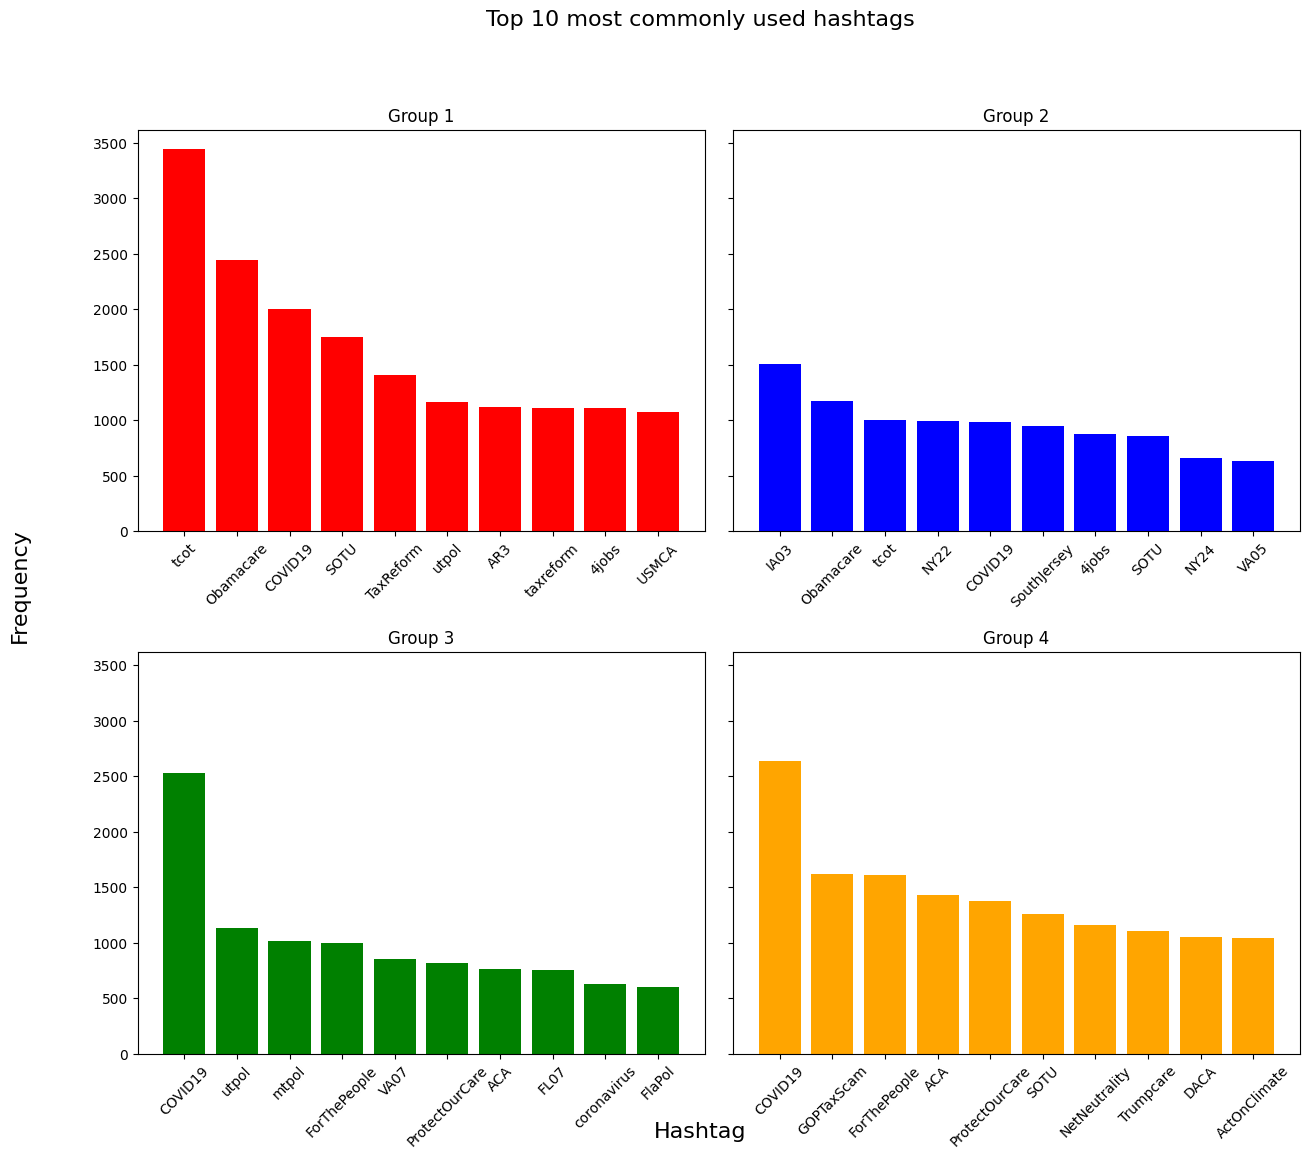

In [18]:
fig, axs = plt.subplots(2, 2, sharey = True, figsize=(15,12))

axs[0,0].bar(top_10_hashtags_group_1, list(sorted_hashtags_group_1_desc.values())[0:10], color='red') 
axs[0,0].set_title('Group 1')
axs[0,0].set_xticklabels(top_10_hashtags_group_1, rotation=45)

axs[0,1].bar(top_10_hashtags_group_2, list(sorted_hashtags_group_2_desc.values())[0:10], color='blue') 
axs[0,1].set_title('Group 2')
axs[0,1].set_xticklabels(top_10_hashtags_group_2, rotation=45)

axs[1,0].bar(top_10_hashtags_group_3, list(sorted_hashtags_group_3_desc.values())[0:10], color='green') 
axs[1,0].set_title('Group 3')
axs[1,0].set_xticklabels(top_10_hashtags_group_3, rotation=45)

axs[1,1].bar(top_10_hashtags_group_4, list(sorted_hashtags_group_4_desc.values())[0:10], color='orange') 
axs[1,1].set_title('Group 4')
axs[1,1].set_xticklabels(top_10_hashtags_group_4, rotation=45)

fig.text(0.5, 0.04, 'Hashtag', ha='center', fontsize=16)
fig.text(0.04, 0.5, 'Frequency', va='center', rotation='vertical', fontsize=16)
fig.suptitle('Top 10 most commonly used hashtags', fontsize=16)

plt.tight_layout(rect=[0.2,0.5,0.3,0.7])
plt.subplots_adjust(wspace=0.05, hspace=0.3)

Do you observe any patterns? Are your findings similar to or
different from your findings in part b) ?. Please explain.

Section A : part d)

c:\Users\shyam\anaconda3\envs\dw_nominate\Lib\site-packages\joypy\joyplot.py:238: UserWarning: At least a column/group has no numeric values.
  warn("At least a column/group has no numeric values.")


<Figure size 1000x800 with 0 Axes>

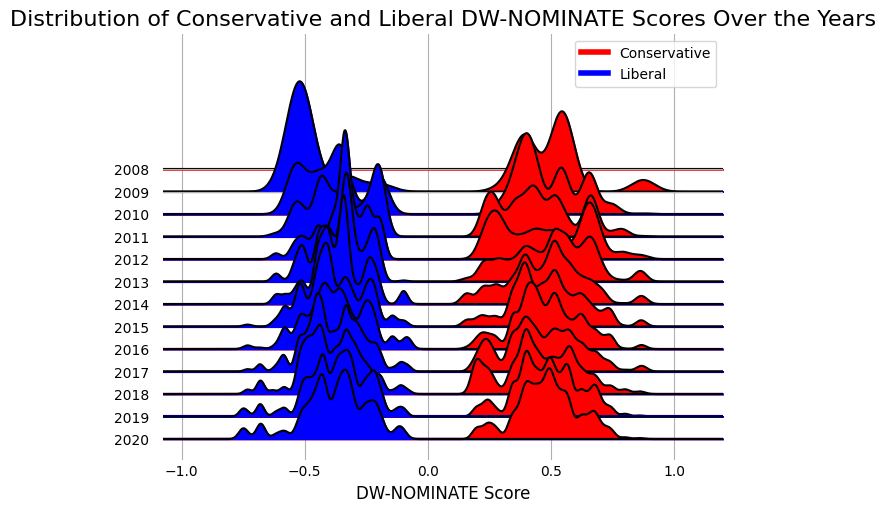

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joypy

# Step 1: Extract relevant columns and sort by year
df = df_training[['dim1_nominate', 'year']].copy()
df = df.sort_values(by='year')

# Create a new dataframe to store the balanced data
df_balanced = pd.DataFrame()

# Step 2: Split dim1_nominate into two columns based on positive and negative values
# Step 3 & 4: For each year, split, fill NaNs to balance, and combine into a new dataframe
for year in df['year'].unique():
    df_year = df[df['year'] == year]

    # Split into conservative (positive) and liberal (negative)
    conservative = df_year[df_year['dim1_nominate'] > 0]['dim1_nominate']
    liberal = df_year[df_year['dim1_nominate'] <= 0]['dim1_nominate']
    
    # Balance the number of rows between conservative and liberal by adding NaNs
    if len(conservative) > len(liberal):
        # Add NaNs to liberal values to match conservative size
        liberal = pd.concat([liberal, pd.Series([np.nan] * (len(conservative) - len(liberal)))], ignore_index=True)
    else:
        # Add NaNs to conservative values to match liberal size
        conservative = pd.concat([conservative, pd.Series([np.nan] * (len(liberal) - len(conservative)))], ignore_index=True)
    
    # Create a temporary dataframe with balanced conservative and liberal values
    df_temp = pd.DataFrame({
        'year': [year] * len(conservative),
        'conservative': conservative.values,
        'liberal': liberal.values
    })
    
    # Append to the balanced dataframe
    df_balanced = pd.concat([df_balanced, df_temp], ignore_index=True)

# Step 5: Now we have a balanced dataframe with three columns: year, conservative, liberal

# Step 6: Plot the joyplot (ridge plot) with consistent red and blue colors
plt.figure(figsize=(10, 8))

# Create joyplot for conservatives (red) and liberals (blue)
fig, axes = joypy.joyplot(
    data=df_balanced, by="year", overlap=2, 
    grid=True, fill=True, linecolor="black", 
    color=["red", "blue"]  # Red for conservatives, blue for liberals
)

# Add x-axis label
plt.xlabel("DW-NOMINATE Score", fontsize=12)

# Manually add y-axis label for year
plt.ylabel("Year", fontsize=12)

# Add title
plt.title("Distribution of Conservative and Liberal DW-NOMINATE Scores Over the Years", fontsize=16)

# Create custom legend
plt.legend(handles=[
    plt.Line2D([0], [0], color='red', lw=4, label='Conservative'),
    plt.Line2D([0], [0], color='blue', lw=4, label='Liberal')
], loc='upper right')

# Show the plot
plt.show()


Do you observe any changes over the years? Please explain. Write your findings in the report.

Section A : part e) a)

In [21]:
import pandas as pd
import numpy as np
from itertools import combinations, product

# Extract the two dimensions (dim1_nominate and dim2_nominate) and drop duplicates
dim_cols = df_training[['dim1_nominate', 'dim2_nominate']].drop_duplicates().to_numpy()

# Function to calculate Euclidean distance between two points in 2D
def calculate_distance_both_dims(i, j):
    point1 = dim_cols[i]
    point2 = dim_cols[j]
    dist = np.sqrt(np.sum((point1 - point2) ** 2))  # Euclidean distance in 2D
    return (i, j, dist)

# Function to find the single most distant pair of points
def get_most_distant_pair():
    most_distant_pair = None

    # Iterate over all unique pairs of points (i, j) using combinations
    for i, j in combinations(range(len(dim_cols)), 2):
        i, j, dist = calculate_distance_both_dims(i, j)
        
        # Check if we found a new most distant pair
        if most_distant_pair is None or dist > most_distant_pair[2]:
            most_distant_pair = (i, j, dist)

    # Return the most distant pair of points and their distance
    return most_distant_pair

# Get the most distant pair of points along both dimensions
most_distant_pair = get_most_distant_pair()

# Extract the actual values of the most distant points
point1_values = dim_cols[most_distant_pair[0]]
point2_values = dim_cols[most_distant_pair[1]]

# Find all rows in the original dataframe where dim1 and dim2 match the most distant pair
df_matching_point1 = df_training[(df_training['dim1_nominate'] == point1_values[0]) & (df_training['dim2_nominate'] == point1_values[1])]
df_matching_point2 = df_training[(df_training['dim1_nominate'] == point2_values[0]) & (df_training['dim2_nominate'] == point2_values[1])]

# Get the first 10 pairs of tweets
tweet_pairs_data = []

# Use itertools.product to find all possible combinations between the two dataframes
pairs = list(product(df_matching_point1['full_text'].head(10), df_matching_point2['full_text'].head(10)))

# Store the first 10 pairs of tweets and their distance
for tweet1, tweet2 in pairs[:10]:
    tweet_pairs_data.append((tweet1, tweet2, most_distant_pair[2]))

# Convert the tweet pairs and distances to a DataFrame
df_tweet_pairs = pd.DataFrame(tweet_pairs_data, columns=['Tweet1', 'Tweet2', 'Distance'])

pd.set_option('display.max_colwidth', None)

# Wrap the text for better readability
df_tweet_pairs['Tweet1'] = df_tweet_pairs['Tweet1'].apply(lambda x: '\n'.join([x[i:i+50] for i in range(0, len(x), 50)]))
df_tweet_pairs['Tweet2'] = df_tweet_pairs['Tweet2'].apply(lambda x: '\n'.join([x[i:i+50] for i in range(0, len(x), 50)]))
# Print the result as a table
df_tweet_pairs

,Tweet1,Tweet2,Distance
0,This weekly roundup: I voted to pass Con. Castro’s\n resolution 2 block Trump's #FakeEmergency declara\ntion &amp; the 1st major gun safety legislation in\n over 25 years. My colleagues and I on @HouseJudic\niary also investigated the admin’s harmful separat\nion policy at the border.#TX29 https://t.co/xUTwAf\nVG1i,"In the wake of #ebola, continued economic progress\n is key for #Liberia. Watch live as I speak to @CG\nDev at 9:30am ET https://t.co/sXDuRhMN6O",1.927598
1,This weekly roundup: I voted to pass Con. Castro’s\n resolution 2 block Trump's #FakeEmergency declara\ntion &amp; the 1st major gun safety legislation in\n over 25 years. My colleagues and I on @HouseJudic\niary also investigated the admin’s harmful separat\nion policy at the border.#TX29 https://t.co/xUTwAf\nVG1i,"Congrats to my alma mater, Snowflake Jr. HS, for s\nelection as a '17 #SamsungSolve STEAM finalist. #S\namsungSolveSJHS https://t.co/RSXZwny23l",1.927598
2,This weekly roundup: I voted to pass Con. Castro’s\n resolution 2 block Trump's #FakeEmergency declara\ntion &amp; the 1st major gun safety legislation in\n over 25 years. My colleagues and I on @HouseJudic\niary also investigated the admin’s harmful separat\nion policy at the border.#TX29 https://t.co/xUTwAf\nVG1i,Just got my copy of the #healthcare bill and I'm g\noing to take time to thoroughly read and review it,1.927598
3,This weekly roundup: I voted to pass Con. Castro’s\n resolution 2 block Trump's #FakeEmergency declara\ntion &amp; the 1st major gun safety legislation in\n over 25 years. My colleagues and I on @HouseJudic\niary also investigated the admin’s harmful separat\nion policy at the border.#TX29 https://t.co/xUTwAf\nVG1i,".@FoxNews @SpecialReport on my effort w @dougducey\n &amp; @SenJohnMcCain to get #AZ out of the oversi\nzed, overworked &amp; oft-overturned #9thCircuit h\nttps://t.co/TtdteiTNmP",1.927598
4,This weekly roundup: I voted to pass Con. Castro’s\n resolution 2 block Trump's #FakeEmergency declara\ntion &amp; the 1st major gun safety legislation in\n over 25 years. My colleagues and I on @HouseJudic\niary also investigated the admin’s harmful separat\nion policy at the border.#TX29 https://t.co/xUTwAf\nVG1i,Cheryl bags trash @justserve project at Salt River\n this morning. LDS and other faiths team up to ser\nve. #justserve https://t.co/rpU1Crk3gN,1.927598
5,This weekly roundup: I voted to pass Con. Castro’s\n resolution 2 block Trump's #FakeEmergency declara\ntion &amp; the 1st major gun safety legislation in\n over 25 years. My colleagues and I on @HouseJudic\niary also investigated the admin’s harmful separat\nion policy at the border.#TX29 https://t.co/xUTwAf\nVG1i,"It's my Earth, Wind &amp; Fire week so #LetsGroove\n w 3 more bills to make rural AZ a #ShiningStar of\n growth &amp; investment https://t.co/LQq76qrcIY",1.927598
6,This weekly roundup: I voted to pass Con. Castro’s\n resolution 2 block Trump's #FakeEmergency declara\ntion &amp; the 1st major gun safety legislation in\n over 25 years. My colleagues and I on @HouseJudic\niary also investigated the admin’s harmful separat\nion policy at the border.#TX29 https://t.co/xUTwAf\nVG1i,#Wastebook sparking lots of great convo but none m\nore entertaining than this @oreillyfactor @greggut\nfeld @bernieandsid exchange on @foxnews https://t.\nco/5vXvxWlsYR,1.927598
7,This weekly roundup: I voted to pass Con. Castro’s\n resolution 2 block Trump's #FakeEmergency declara\ntion &amp; the 1st major gun safety legislation in\n over 25 years. My colleagues and I on @HouseJudic\niary also investigated the admin’s harmful separat\nion policy at the border.#TX29 https://t.co/xUTwAf\nVG1i,Wishing a happy 100th birthday to our great state \nof Arizona today. Here’s to the all that the next \n100 years will bring. #AZcentennial,1.927598
8,This weekly roundup: I voted to pass Con. Castro’s\n resolution 2 block Trump's #FakeEmergency declara\ntion &amp; the 1st major gun safety legislation in\n over 25 

b)

In [22]:
import pandas as pd
import numpy as np
from itertools import combinations

# Sort the dataframe based on dim1_nominate and get the extremes
df_training_sorted_dim1 = df_training.sort_values(by=['dim1_nominate'])

# Take the top 10 smallest and top 10 largest values of dim1_nominate
df_training_dim1_extremes = pd.concat([df_training_sorted_dim1.head(10), df_training_sorted_dim1.tail(10)])

# Extract the 1st dimension for distance computation (using the extremes)
dim1_points_extremes = df_training_dim1_extremes['dim1_nominate'].to_numpy()

# Function to calculate distance between two points in 1D
def calculate_distance_1d(i, j):
    dist = abs(dim1_points_extremes[i] - dim1_points_extremes[j])
    return (i, j, dist)

# Function to process all pairs and keep only the top-10 distant pairs
def get_top_10_distant_pairs_1d():
    top_10_distant = []

    # Iterate over all unique pairs of tweets (i, j) using combinations
    for i, j in combinations(range(len(dim1_points_extremes)), 2):
        i, j, dist = calculate_distance_1d(i, j)
        
        # If we have less than 10 pairs, append directly
        if len(top_10_distant) < 10:
            top_10_distant.append((i, j, dist))
            top_10_distant.sort(key=lambda x: x[2], reverse=True)  # Sort by distance (largest first)
        
        # If we already have 10 pairs, replace the smallest if a larger distance is found
        elif dist > top_10_distant[-1][2]:
            top_10_distant[-1] = (i, j, dist)
            top_10_distant.sort(key=lambda x: x[2], reverse=True)  # Sort by distance (largest first)

    # Retrieve tweet texts for the top-10 most distant pairs from df_training_dim1_extremes
    df_top_10_distances_dim1 = pd.DataFrame(
        [(i, j, dist, df_training_dim1_extremes.iloc[i]['full_text'], df_training_dim1_extremes.iloc[j]['full_text']) for i, j, dist in top_10_distant],
        columns=['tweet1_index', 'tweet2_index', 'distance', 'tweet1_text', 'tweet2_text']
    )
    
    return df_top_10_distances_dim1

# Get the top-10 distant tweets along dim1 from the extremes
df_top_10_distances_dim1 = get_top_10_distant_pairs_1d()

# Display the results
# print("Top-10 most distant tweets along the 1st dimension (from extremes):")
# print(df_top_10_distances_dim1[['tweet1_text', 'tweet2_text', 'distance']])
pd.set_option('display.max_colwidth', None)

# Wrap the text for better readability
df_top_10_distances_dim1['tweet1_text'] = df_top_10_distances_dim1['tweet1_text'].apply(lambda x: '\n'.join([x[i:i+50] for i in range(0, len(x), 50)]))
df_top_10_distances_dim1['tweet2_text'] = df_top_10_distances_dim1['tweet2_text'].apply(lambda x: '\n'.join([x[i:i+50] for i in range(0, len(x), 50)]))


df_top_10_distances_dim1[['tweet1_text', 'tweet2_text', 'distance']]

,tweet1_text,tweet2_text,distance
0,"""Since 2014, the EXIM Bank has provided over $450 \nmillion worth of export support value in Texas’s 2\n9th Congressional District... We know the EXIM Ban\nk’s programs work and in an increasingly competiti\nve environment, we should not abandon them."" #Supp\nortSmallBusiness https://t.co/O8DhdzugHv",Got @dougducey 's back in #LakeHavasuCity with @Se\nnJohnMcCain and @RepGosar http://t.co/5spgxeSdo6,1.626546
1,"""Since 2014, the EXIM Bank has provided over $450 \nmillion worth of export support value in Texas’s 2\n9th Congressional District... We know the EXIM Ban\nk’s programs work and in an increasingly competiti\nve environment, we should not abandon them."" #Supp\nortSmallBusiness https://t.co/O8DhdzugHv","#SSOT list should mean something &amp; w/ #Cuba’s \nremoval, today it means a little more. Good for US\n &amp; the Cuban people",1.626546
2,"""Since 2014, the EXIM Bank has provided over $450 \nmillion worth of export support value in Texas’s 2\n9th Congressional District... We know the EXIM Ban\nk’s programs work and in an increasingly competiti\nve environment, we should not abandon them."" #Supp\nortSmallBusiness https://t.co/O8DhdzugHv","Senator Reid: ""We get nowhere with doing amendment\ns."" I respectfully believe my constituents disagre\ne. #unbelievable",1.626546
3,"""Since 2014, the EXIM Bank has provided over $450 \nmillion worth of export support value in Texas’s 2\n9th Congressional District... We know the EXIM Ban\nk’s programs work and in an increasingly competiti\nve environment, we should not abandon them."" #Supp\nortSmallBusiness https://t.co/O8DhdzugHv",Holding presser w/ @MartinHeinrich at 4:45pm ET to\n introduce #DomesticViolenceLoophole Closure Act.\n Watch live https://t.co/nM7wRN6bzR,1.626546
4,"""Since 2014, the EXIM Bank has provided over $450 \nmillion worth of export support value in Texas’s 2\n9th Congressional District... We know the EXIM Ban\nk’s programs work and in an increasingly competiti\nve environment, we should not abandon them."" #Supp\nortSmallBusiness https://t.co/O8DhdzugHv",Received briefing today in Yarnell from Incident M\nanagement Team. #yarnellfire is 90% contained. htt\np://t.co/ljsi7WA2gI,1.626546
5,"""Since 2014, the EXIM Bank has provided over $450 \nmillion worth of export support value in Texas’s 2\n9th Congressional District... We know the EXIM Ban\nk’s programs work and in an increasingly competiti\nve environment, we should not abandon them."" #Supp\nortSmallBusiness https://t.co/O8DhdzugHv",".@StephenAtHome eyeballing my #Senate desk rug wit\nh that ""Nic Cage at the @USNatArchives"" look https\n://t.co/DsBlqrwUT3",1.626546
6,"""Since 2014, the EXIM Bank has provided over $450 \nmillion worth of export support value in Texas’s 2\n9th Congressional District... We know the EXIM Ban\nk’s programs work and in an increasingly competiti\nve environment, we should not abandon them."" #Supp\nortSmallBusiness https://t.co/O8DhdzugHv",Tune into @kjzzphoenix at 9:15am to learn more abo\nut my #nafta4az initiative &amp; then share your s\ntory at https://t.co/LklsMlmL8b,1.626546
7,"""Since 2014, the EXIM Bank has provided over $450 \nmillion worth of export support value in Texas’s 2\n9th Congressional District... We know the EXIM Ban\nk’s programs work and in an increasingly competiti\nve environment, we should not abandon them."" #Supp\nortSmallBusiness https://t.co/O8DhdzugHv",Headed to the Senate Floor to talk about the econo\nmic freedom / human rights agenda for #Cuba,1.626546
8,"""Since 2014, the EXIM Bank has provided over $450 \nmillion worth of export support value in Texas’s 2\n9th Congressional District... We know the EXIM Ban\nk’s programs work and in an increasingly competiti\nve environment, we should not abandon them."" #Supp\nortSmallBusiness https://t.co/O8DhdzugHv",Partnerships like Future Forest are critical to re\nach the pace of restoration #AZ needs for wildfire\n risk reduction. https://t.co/0KuIgxvWpW,1.626546

c)

In [23]:
import pandas as pd
import numpy as np
from itertools import combinations

# Sort the dataframe based on dim2_nominate and get the extremes
df_training_sorted_dim2 = df_training.sort_values(by=['dim2_nominate'])

# Take the top 10 smallest and top 10 largest values of dim2_nominate
df_training_dim2_extremes = pd.concat([df_training_sorted_dim2.head(10), df_training_sorted_dim2.tail(10)])

# Extract the 2nd dimension for distance computation (using the extremes)
dim2_points_extremes = df_training_dim2_extremes['dim2_nominate'].to_numpy()

# Function to calculate distance between two points in 1D
def calculate_distance_2d(i, j):
    dist = abs(dim2_points_extremes[i] - dim2_points_extremes[j])
    return (i, j, dist)

# Function to process all pairs and keep only the top-10 distant pairs
def get_top_10_distant_pairs_2d():
    top_10_distant = []

    # Iterate over all unique pairs of tweets (i, j) using combinations
    for i, j in combinations(range(len(dim2_points_extremes)), 2):
        i, j, dist = calculate_distance_2d(i, j)
        
        # If we have less than 10 pairs, append directly
        if len(top_10_distant) < 10:
            top_10_distant.append((i, j, dist))
            top_10_distant.sort(key=lambda x: x[2], reverse=True)  # Sort by distance (largest first)
        
        # If we already have 10 pairs, replace the smallest if a larger distance is found
        elif dist > top_10_distant[-1][2]:
            top_10_distant[-1] = (i, j, dist)
            top_10_distant.sort(key=lambda x: x[2], reverse=True)  # Sort by distance (largest first)

    # Retrieve tweet texts for the top-10 most distant pairs from df_training_dim2_extremes
    df_top_10_distances_dim2 = pd.DataFrame(
        [(i, j, dist, df_training_dim2_extremes.iloc[i]['full_text'], df_training_dim2_extremes.iloc[j]['full_text']) for i, j, dist in top_10_distant],
        columns=['tweet1_index', 'tweet2_index', 'distance', 'tweet1_text', 'tweet2_text']
    )
    
    return df_top_10_distances_dim2

# Get the top-10 distant tweets along dim2 from the extremes
df_top_10_distances_dim2 = get_top_10_distant_pairs_2d()

# Display the results
# print("Top-10 most distant tweets along the 2nd dimension (from extremes):")
# print(df_top_10_distances_dim2[['tweet1_text', 'tweet2_text', 'distance']])
# Set option to display the full column content
pd.set_option('display.max_colwidth', None)

# Wrap the text for better readability
df_top_10_distances_dim2['tweet1_text'] = df_top_10_distances_dim2['tweet1_text'].apply(lambda x: '\n'.join([x[i:i+50] for i in range(0, len(x), 50)]))
df_top_10_distances_dim2['tweet2_text'] = df_top_10_distances_dim2['tweet2_text'].apply(lambda x: '\n'.join([x[i:i+50] for i in range(0, len(x), 50)]))


df_top_10_distances_dim2[['tweet1_text', 'tweet2_text', 'distance']]

,tweet1_text,tweet2_text,distance
0,We must never forget the 6 million lives stolen aw\nay from us during the #Holocaust. May their memori\nes be a blessing &amp; may we fight everyday to ac\ntualize our commitment to the solemn vow of #Never\nAgain. #HolocaustRememberanceDay,"Are you a high school student with a passion for s\ncience, tech, engineering or math? Apply to my STE\nM Scholars program which aims to connect students \nwith virtual learning experiences and learn more a\nbout STEM career opportunities at businesses in #T\nX32! https://t.co/uScso2yBhz https://t.co/LeYnvZ8Z\nV5",1.709491
1,We must never forget the 6 million lives stolen aw\nay from us during the #Holocaust. May their memori\nes be a blessing &amp; may we fight everyday to ac\ntualize our commitment to the solemn vow of #Never\nAgain. #HolocaustRememberanceDay,I am live now at my #VeteransDay Town Hall in Dall\nas. Watch as we hear from North Texas veterans and\n I give an update on my work in Congress as a memb\ner of the Veterans’ Affairs Committee: https://t.c\no/s7TyVlbbvH #TX32,1.709491
2,We must never forget the 6 million lives stolen aw\nay from us during the #Holocaust. May their memori\nes be a blessing &amp; may we fight everyday to ac\ntualize our commitment to the solemn vow of #Never\nAgain. #HolocaustRememberanceDay,"Starting first and foremost with my wife Aly, and \nmy own mom, I want to wish all of the hardworking \nand dedicated moms across North Texas a very happy\n #MothersDay! https://t.co/UzSei5DIMy",1.709491
3,We must never forget the 6 million lives stolen aw\nay from us during the #Holocaust. May their memori\nes be a blessing &amp; may we fight everyday to ac\ntualize our commitment to the solemn vow of #Never\nAgain. #HolocaustRememberanceDay,Need help with a federal agency? My office is here\n to help North Texans cut through red tape. Last y\near I helped Barbara get the tax refund she was ow\ned. Visit my website to learn how we have helped c\nonstituents in #TX32 and how we can help you: http\ns://t.co/E5PWKWfWrk https://t.co/k5MVVBpDPC,1.709491
4,We must never forget the 6 million lives stolen aw\nay from us during the #Holocaust. May their memori\nes be a blessing &amp; may we fight everyday to ac\ntualize our commitment to the solemn vow of #Never\nAgain. #HolocaustRememberanceDay,Take the time today to thank a teacher! My mom was\n a Dallas public school teacher and teachers in ou\nr public schools were so important to helping me s\nucceed. Let’s all commit to ensuring educators acr\noss North Texas get the support they need. #Teache\nrAppreciationDay. https://t.co/T0Ia0prNO9,1.709491
5,We must never forget the 6 million lives stolen aw\nay from us during the #Holocaust. May their memori\nes be a blessing &amp; may we fight everyday to ac\ntualize our commitment to the solemn vow of #Never\nAgain. #HolocaustRememberanceDay,"Listening to North Texans, answering questions and\n helping you navigate this difficult time is my to\np priority. If you missed my telephone town hall o\nn #COVID19 last week, take a listen and if you nee\nd help w/ federal programs call my office: 972-972\n-7949. https://t.co/0Rh42wOspD",1.709491
6,We must never forget the 6 million lives stolen aw\nay from us during the #Holocaust. May their memori\nes be a blessing &amp; may we fight everyday to ac\ntualize our commitment to the solemn vow of #Never\nAgain. #HolocaustRememberanceDay,"Over the past 25 years, the Violence Against Women\n Act has been vital in the effort to reduce domest\nic violence and has been a lifeline for survivors.\n I implore the Senate to reauthorize this bipartis\nan bill so we can continue that work and make our \ncommunities safer. #VAWA25",1.709491
7,We must never forget the 6 million lives stolen aw\nay from us during the #Holocaust. May their memori\nes be a blessing &amp; may we fight everyday to ac\ntualize our commitment to the solemn vow of #Never\nAgain. #HolocaustRememberanceDay,"This is a time when government

Do you observe any patterns? Please explain. Write your findings in the report.
(Add the tables to the report.)